In [1]:
import pycaret

In [2]:
from pycaret.regression import *

In [4]:
import gradio

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("volvep12.csv")

In [7]:
df

,Unnamed: 0,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
1,2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2,2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
3,2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
4,2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
3287,2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
3288,2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
3289,2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

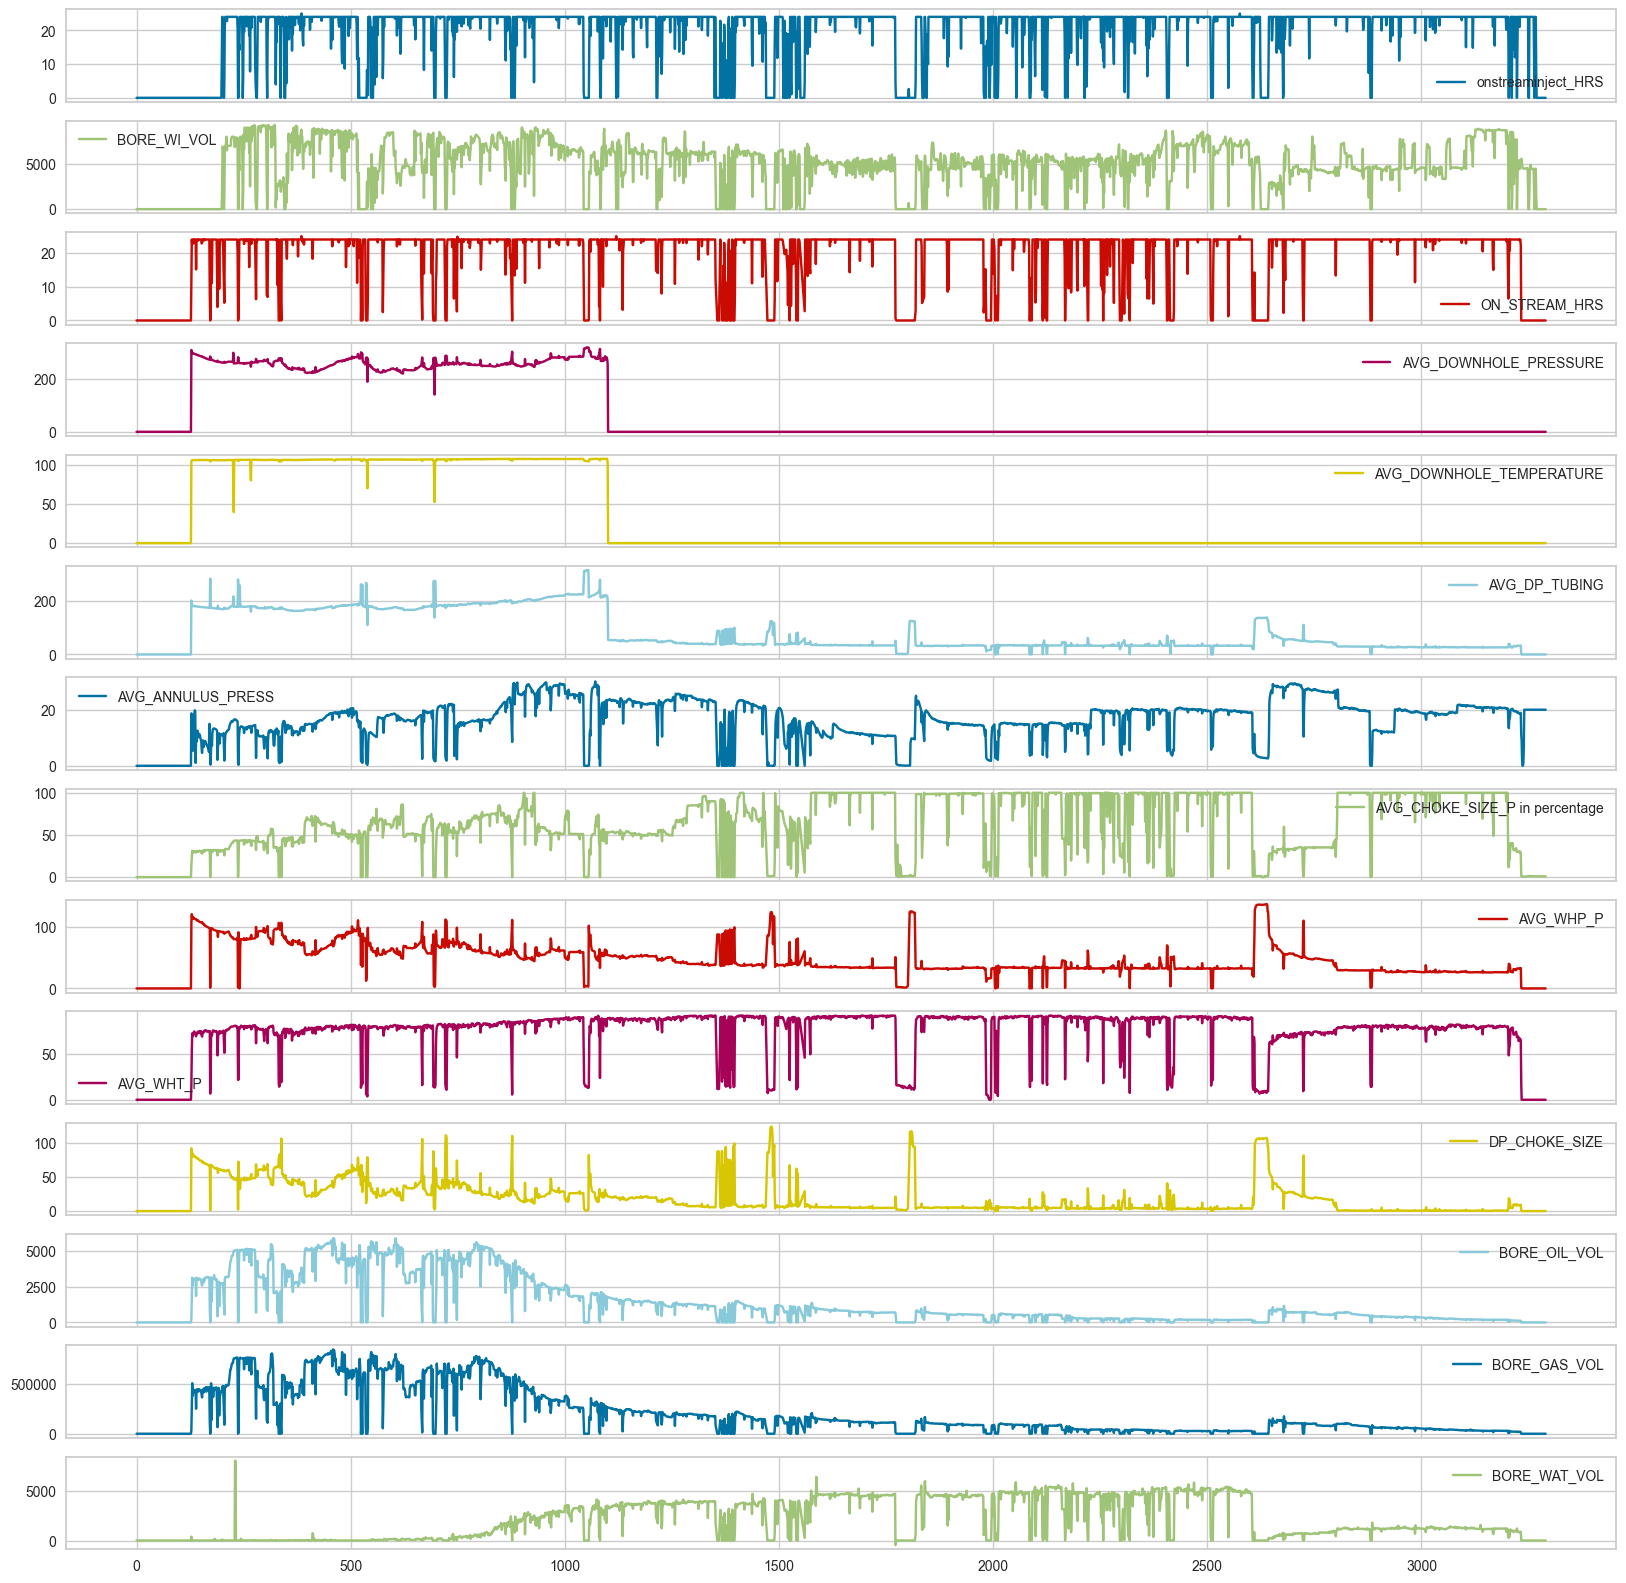

In [8]:
df.plot(subplots=True,figsize=(20,20))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

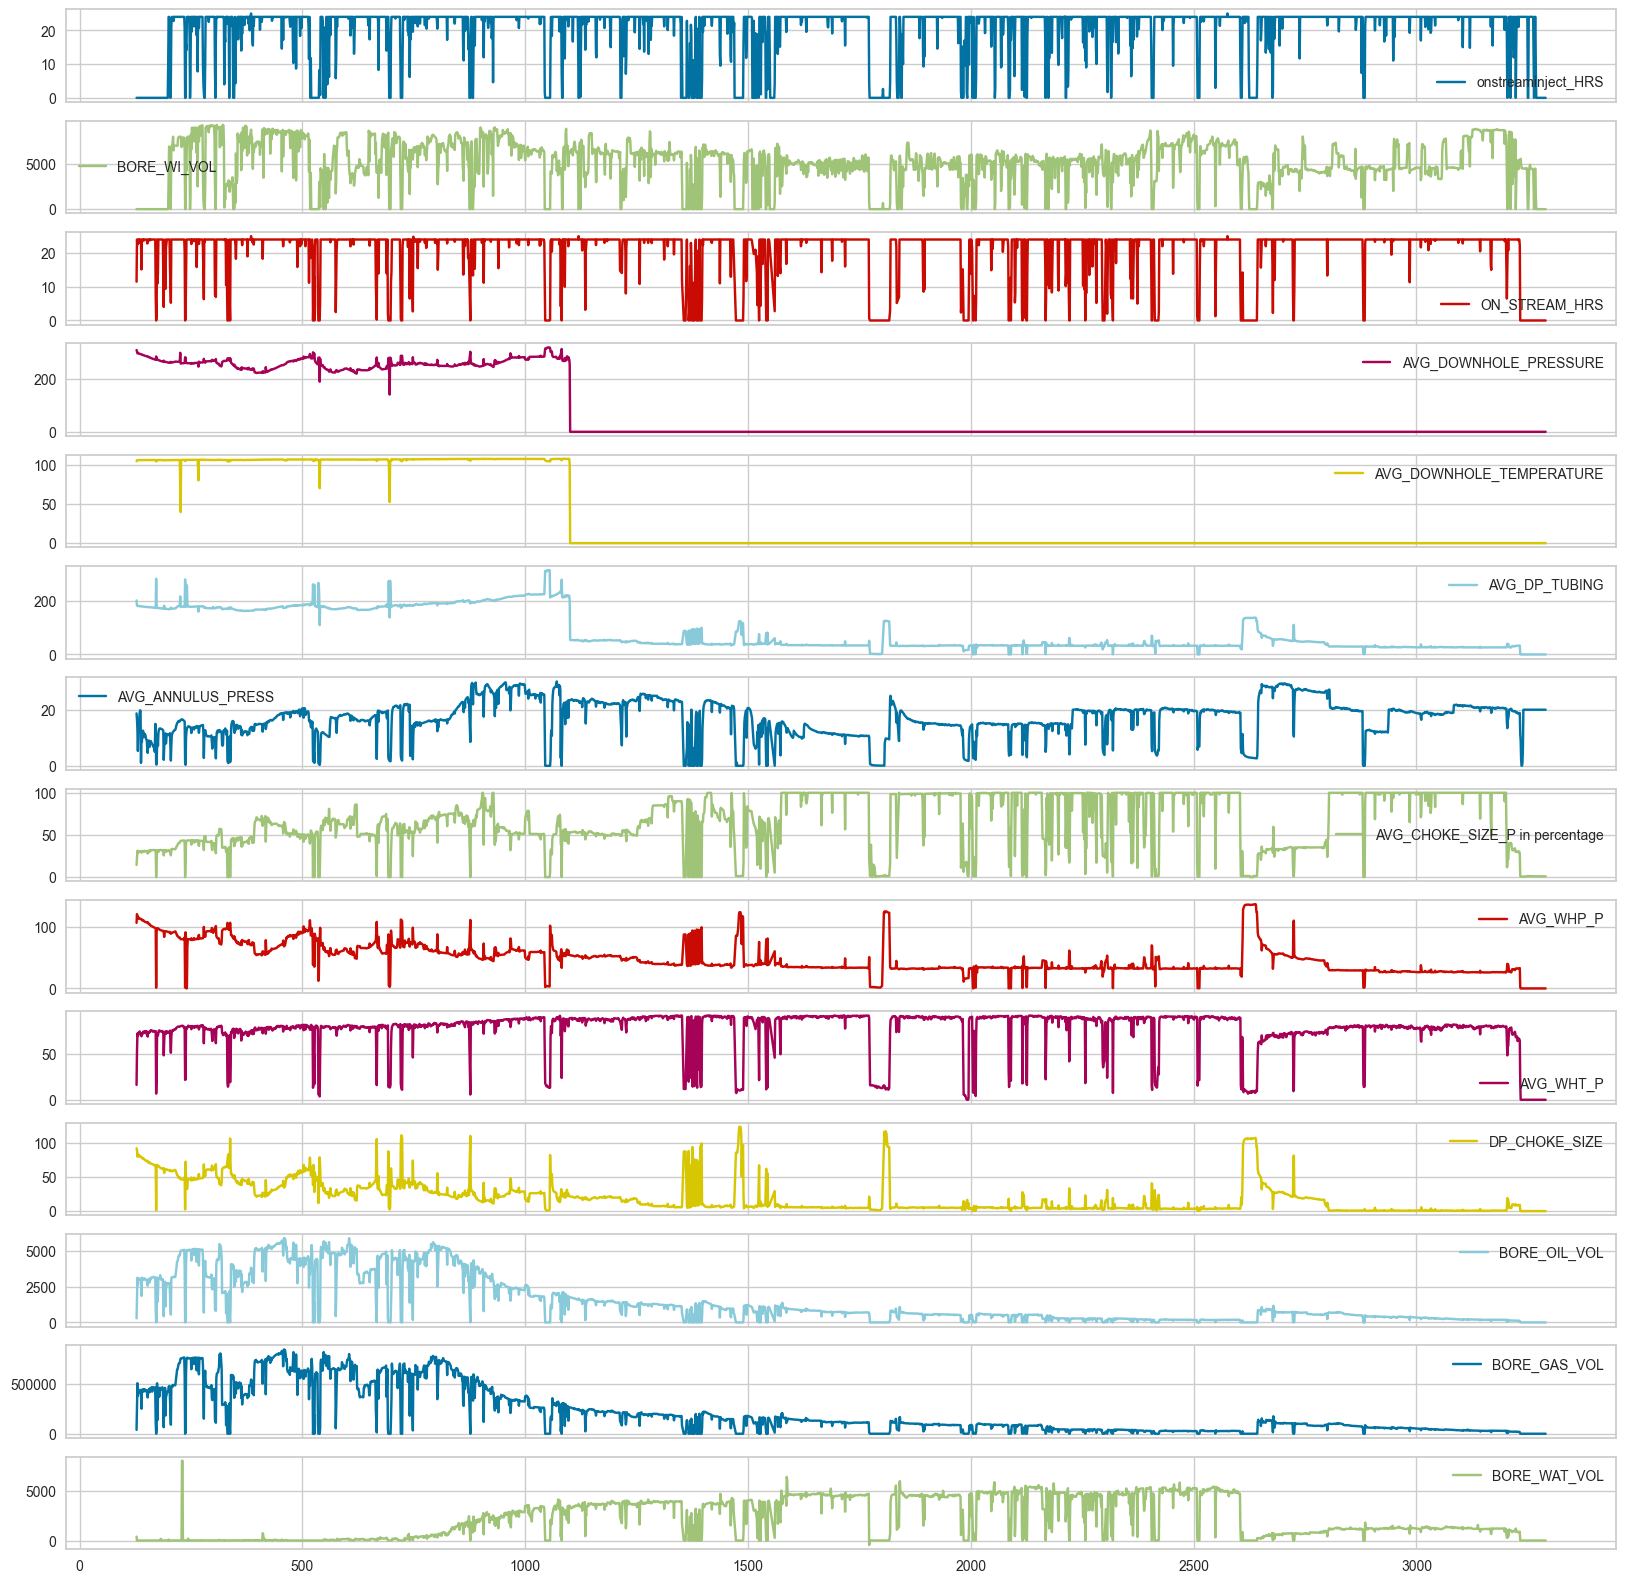

In [9]:
df[128:].plot(subplots=True,figsize=(20,20))

In [10]:
df = df[128:]

In [11]:
df = df.drop(['Unnamed: 0','AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE','BORE_GAS_VOL','BORE_WAT_VOL'],axis=1)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

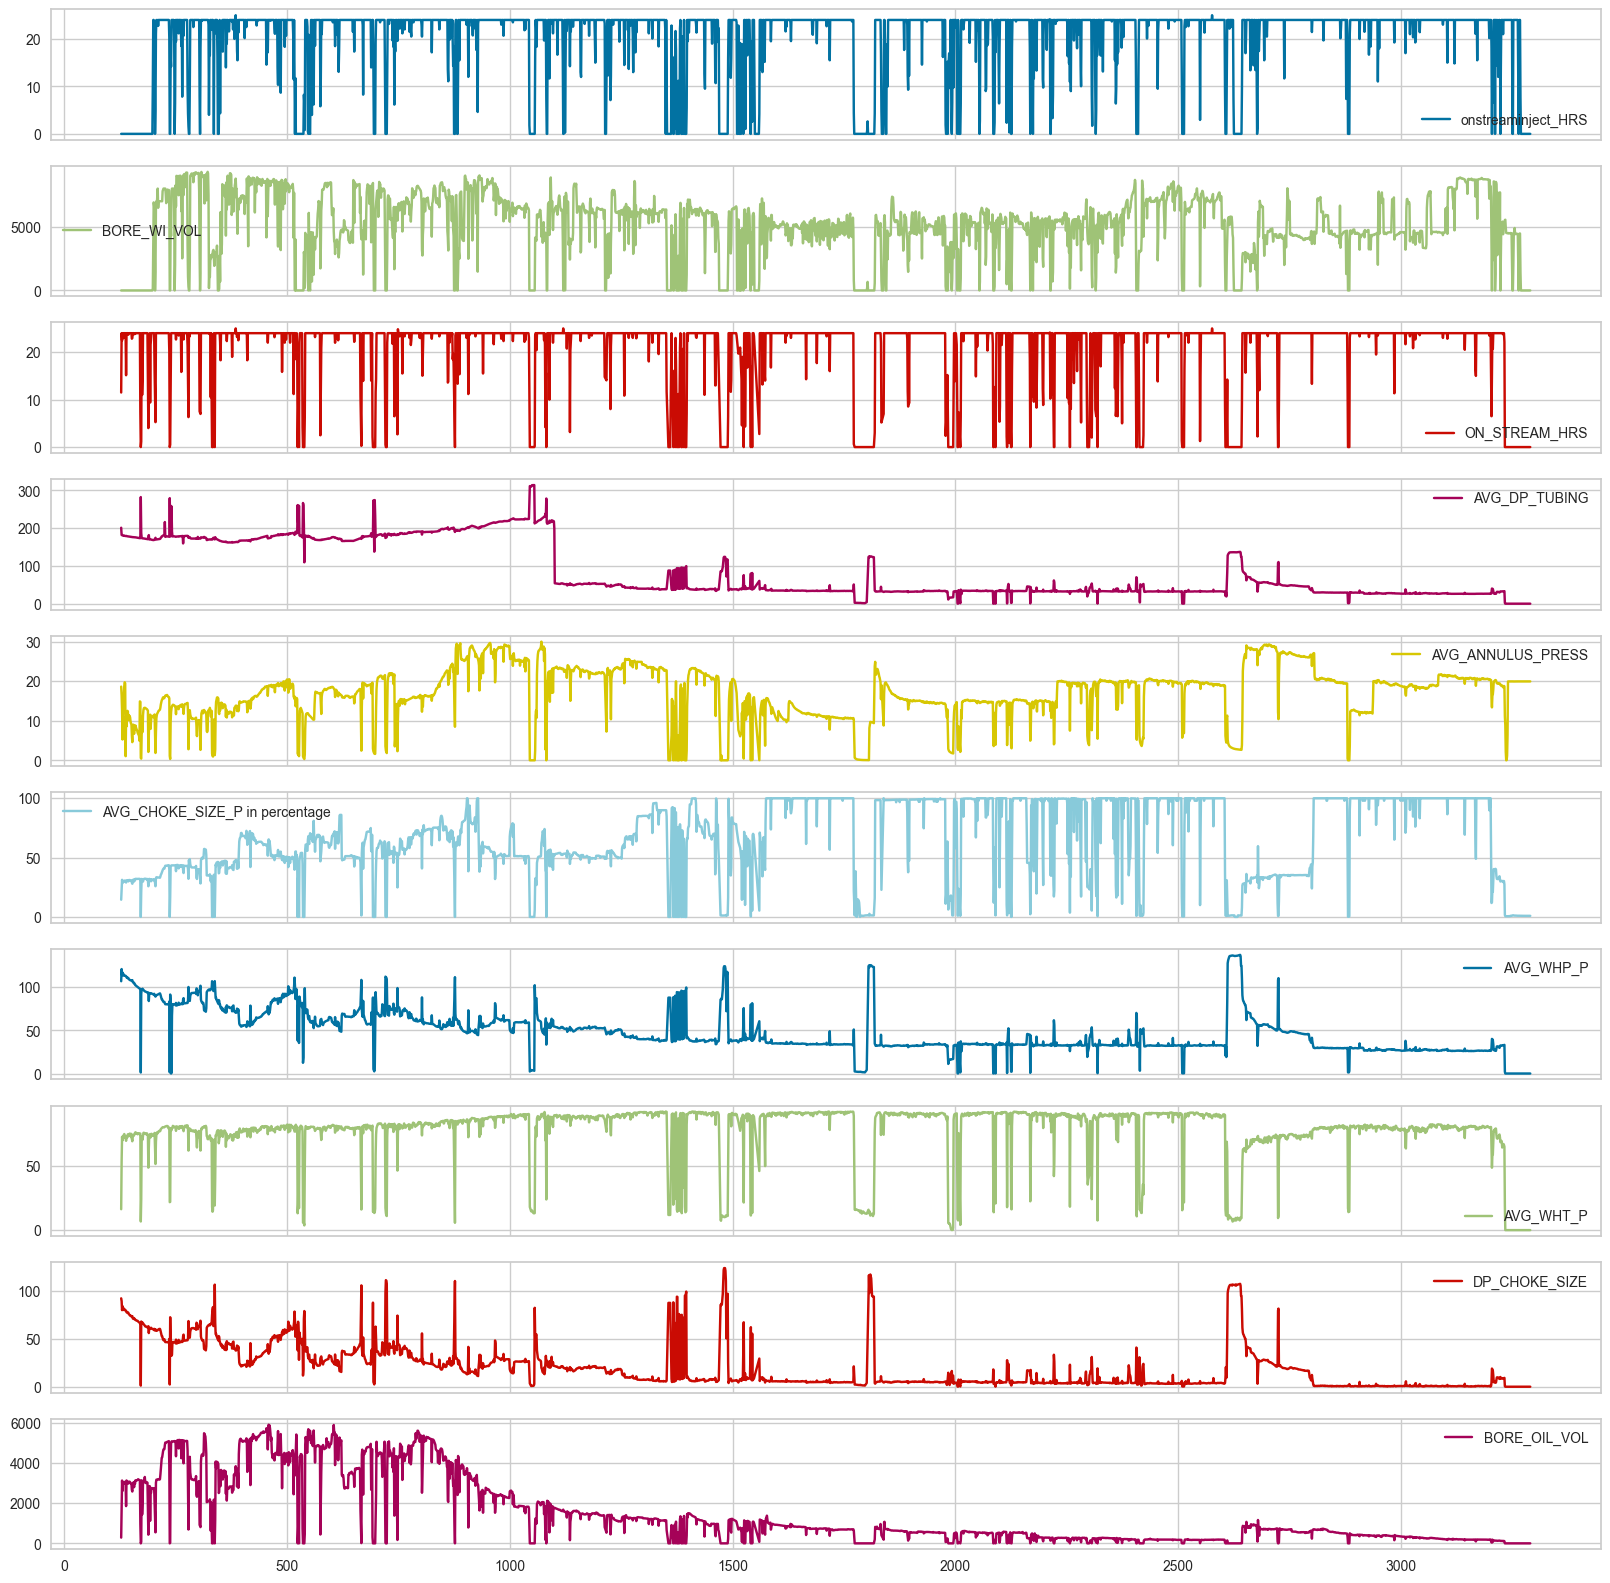

In [12]:
df.plot(subplots=True,figsize=(20,20))

In [13]:
exp = setup(data=df,target="BORE_OIL_VOL",normalize = True)

,Description,Value
0,Session id,8453
1,Target,BORE_OIL_VOL
2,Target type,Regression
3,Original data shape,"(3163, 10)"
4,Transformed data shape,"(3163, 10)"
5,Transformed train set shape,"(2214, 10)"
6,Transformed test set shape,"(949, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [14]:
exp.train_transformed

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
606,0.462986,-0.532657,0.425972,1.220553,0.127927,0.151766,0.361499,0.174699,0.181465,5509.0
996,0.462986,0.687505,0.425972,1.806707,1.784789,-0.476268,0.553515,0.482014,0.391249,2267.0
516,0.462986,1.010501,0.425972,1.354607,-0.148924,-0.669983,2.110406,0.112762,2.061768,4366.0
2122,-1.332647,-1.421302,-2.279260,-0.712735,-1.229480,-1.877892,-0.580125,0.249296,-0.676634,66.0
920,0.462986,1.413029,0.425972,1.608797,1.617162,0.417560,-0.001173,0.447721,-0.218280,3215.0
...,...,...,...,...,...,...,...,...,...,...
2291,0.462986,0.188809,0.425972,-0.726028,0.347892,1.028782,-0.619584,0.534114,-0.683357,269.0
1876,0.462986,-0.155287,0.425972,-0.729762,-0.248894,1.016916,-0.630668,0.559799,-0.619017,615.0
1196,0.462986,0.542644,0.425972,-0.456563,0.740187,-0.470150,0.180324,0.444032,0.007104,1508.0
3177,0.462986,1.449142,0.425972,-0.812953,0.492006,1.055154,-0.877622,0.106068,-0.822725,186.0


In [ ]:
exp.train_transformed.columns

In [15]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,66.4109,27924.6168,159.9651,0.9898,0.4210,0.1554,0.1110
rf,Random Forest Regressor,84.6932,39366.0962,192.4299,0.9857,0.4235,0.2003,0.2030
lightgbm,Light Gradient Boosting Machine,94.7737,38983.3993,191.2359,0.9857,0.8050,0.1663,0.1110
gbr,Gradient Boosting Regressor,134.4095,51708.5371,225.8388,0.9809,0.9198,0.2811,0.0890
dt,Decision Tree Regressor,103.0337,70755.8191,259.1330,0.9742,0.3995,0.1823,0.0100
knn,K Neighbors Regressor,125.4642,83330.9629,283.0288,0.9694,0.3835,0.2083,0.0150
ada,AdaBoost Regressor,290.6722,157096.9738,395.6433,0.9422,1.5839,0.7127,0.0460
ridge,Ridge Regression,660.2557,825932.1632,907.3812,0.6950,2.1091,1.5810,0.0110
br,Bayesian Ridge,660.0330,826066.3500,907.4778,0.6950,2.1058,1.5709,0.0090
llar,Lasso Least Angle Regression,659.7216,826179.3423,907.5486,0.6950,2.1014,1.5608,0.0090


ExtraTreesRegressor(n_jobs=-1, random_state=8453)

In [16]:
rf = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,70.5767,22617.7216,150.3919,0.9912,0.4950,0.1971
1,105.9655,84354.2850,290.4381,0.9702,0.4902,0.1378
2,89.3953,75355.3892,274.5094,0.9740,0.4750,0.1244
3,88.8127,37856.0329,194.5663,0.9874,0.3123,0.1556
4,91.3330,38168.9188,195.3687,0.9848,0.3759,0.1307
5,73.3155,19287.9704,138.8811,0.9934,0.2498,0.1592
6,87.9204,31411.8922,177.2340,0.9865,0.4196,0.2602
7,89.1142,31875.5760,178.5373,0.9892,0.5129,0.5636
8,74.3054,23808.4647,154.2999,0.9916,0.2721,0.1689


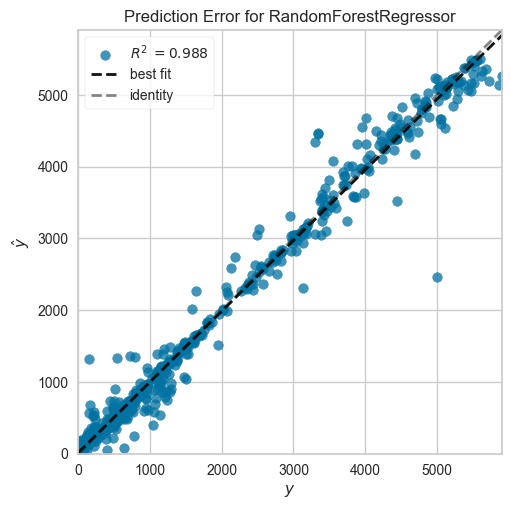

In [17]:
plot_model(rf, plot = 'error')

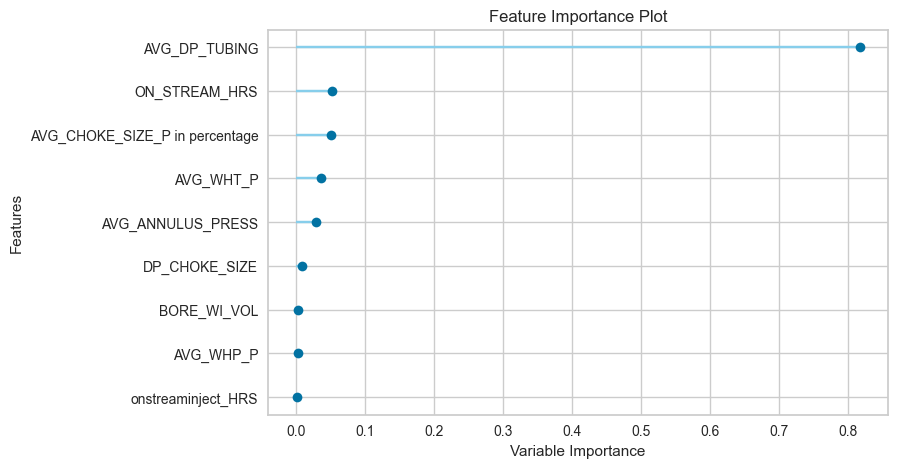

In [18]:
plot_model(rf, plot='feature')

In [19]:
final_rf = finalize_model(rf)

In [20]:
save_model(final_rf, "rf_volvep12")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['onstreaminject_HRS',
                                              'BORE_WI_VOL', 'ON_STREAM_HRS',
                                              'AVG_DP_TUBING',
                                              'AVG_ANNULUS_PRESS',
                                              'AVG_CHOKE_SIZE_P in percentage',
                                              'AVG_WHP_P', 'AVG_WHT_P',
                                              'DP_CHOKE_SIZE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanCol

In [21]:
rf_load = load_model("rf_volvep12")

Transformation Pipeline and Model Successfully Loaded


In [ ]:
create_app